# Simulation distributions analysis

#### Maria Silva, February 2024

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import skewnorm, gamma, skew, rv_discrete, uniform, norm

## ETH base fee

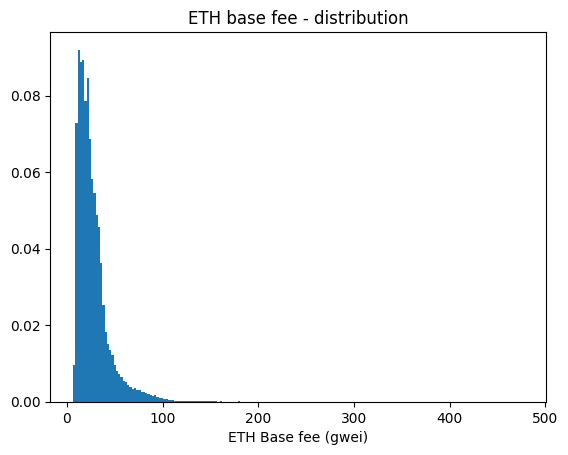

26.913 18.28 3.61


In [2]:
base_df = pd.read_csv("../data/eth-base-fees-1-month.csv")
data = base_df['base_fee_gwei'].values

counts, bins = np.histogram(data, bins=200)
plt.hist(bins[:-1], bins, weights=counts/len(data))
plt.title("ETH base fee - distribution")
plt.xlabel('ETH Base fee (gwei)')

plt.show()

print(data.mean().round(3), data.std().round(2), np.round(skew(data), 2))

In [3]:
base_df = pd.read_csv("../data/eth-base-fees-1-month.csv")
data = base_df['base_fee_gwei'].values
# a, loc, scale
gamma.fit(data)

(1.806246728780864, 6.302159902875465, 11.398472223838542)

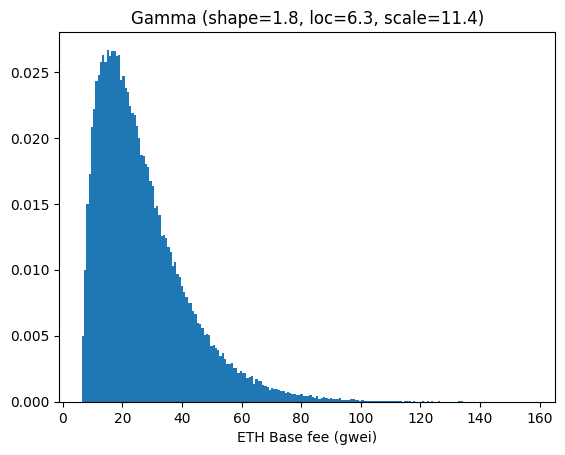

26.818 15.3 1.48


In [4]:
gen = gamma.rvs(a=1.8, loc=6.3, scale=11.4, size=100000)

counts, bins = np.histogram(gen, bins=200)
plt.hist(bins[:-1], bins, weights=counts/len(gen))
plt.title("Gamma (shape=1.8, loc=6.3, scale=11.4)")
plt.xlabel('ETH Base fee (gwei)')
plt.show()

print(gen.mean().round(3), gen.std().round(2), np.round(skew(gen), 2))

## OP priority fees on ETH mainnet

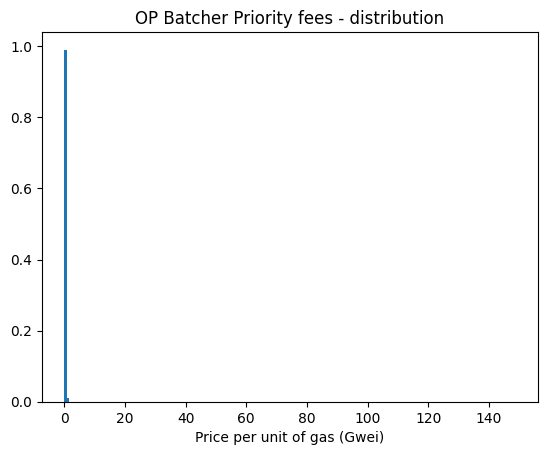

0.033 0.64 205.56


In [5]:
prio_df = pd.read_csv("../data/op-batcher-txs-6-months.csv")
data = prio_df['max_priority_fee_gwei'].dropna().values

counts, bins = np.histogram(data, bins=200)
plt.hist(bins[:-1], bins, weights=counts/len(data))
plt.title("OP Batcher Priority fees - distribution")
plt.xlabel('Price per unit of gas (Gwei)')
plt.show()

print(data.mean().round(3), data.std().round(2), np.round(skew(data), 2))

In [6]:
prio_df = pd.read_csv("../data/op-batcher-txs-6-months.csv")
data = prio_df['max_priority_fee_gwei'].dropna().values
# a, loc, scale
gamma.fit(data)

(0.00017114997606883844, 1.999999999999871e-09, 0.36066006992813404)

Note that the best fit does not lead to a large enough skewness and std. We have increased the scale parameter to fix it.

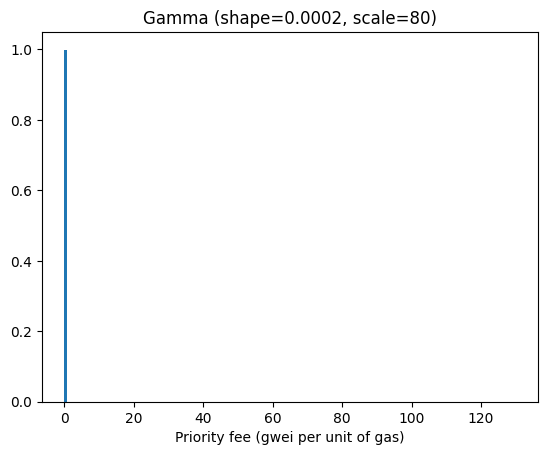

0.011 0.73 116.01


In [7]:
gen = gamma.rvs(a=0.0002, scale=80, size=100000)

counts, bins = np.histogram(gen, bins=200)
plt.hist(bins[:-1], bins, weights=counts/len(gen))
plt.title("Gamma (shape=0.0002, scale=80)")
plt.xlabel('Priority fee (gwei per unit of gas)')
plt.show()

print(gen.mean().round(3), gen.std().round(2), np.round(skew(gen), 2))

## L2 base fees on OP mainnet

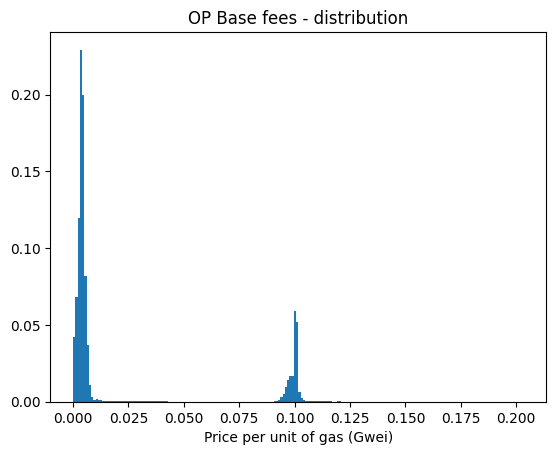

0.023 0.04 1.54


In [8]:
base_df = pd.read_csv("../data/op-base-fees-1-month.csv")
data = base_df['base_fee_gwei'].dropna().values

counts, bins = np.histogram(data, bins=200)
plt.hist(bins[:-1], bins, weights=counts/len(data))
plt.title("OP Base fees - distribution")
plt.xlabel('Price per unit of gas (Gwei)')
plt.show()

print(data.mean().round(3), data.std().round(2), np.round(skew(data), 2))

In [9]:
base_df = pd.read_csv("../data/op-base-fees-1-month.csv")
data = base_df['base_fee_gwei'].dropna().values
# a, loc, scale
gamma.fit(data)

(0.5134643094174745, 1.7344999991275883e-05, 0.04482306445091146)

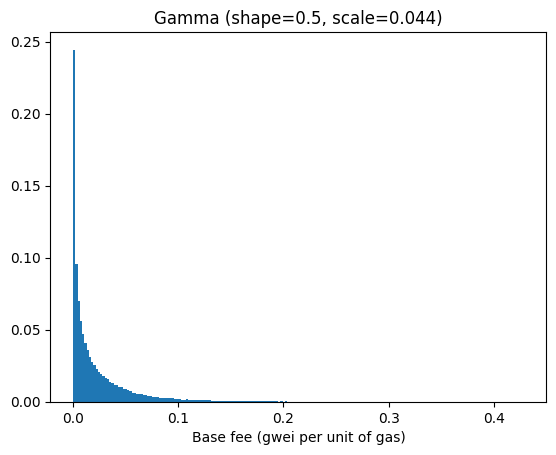

0.022 0.03 2.88


In [23]:
gen = gamma.rvs(a=0.5, scale=0.044, size=100000)

counts, bins = np.histogram(gen, bins=200)
plt.hist(bins[:-1], bins, weights=counts/len(gen))
plt.title("Gamma (shape=0.5, scale=0.044)")
plt.xlabel('Base fee (gwei per unit of gas)')
plt.show()

print(gen.mean().round(3), gen.std().round(2), np.round(skew(gen), 2))

## L2 priority fees on OP mainnet

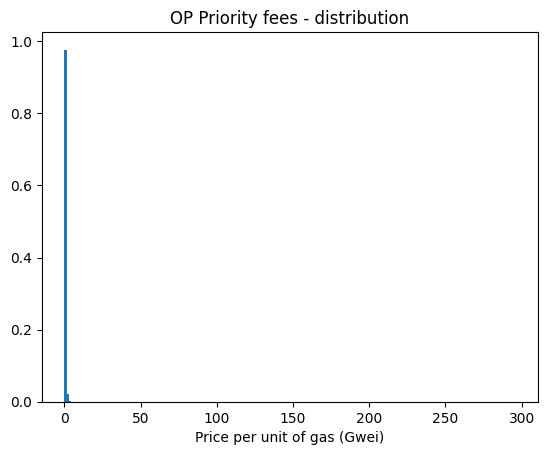

0.089 0.92 155.47


In [11]:
prio_df = pd.read_csv("../data/op-priority-fees-15-days.csv").sample(frac=0.1)
data = prio_df['max_priority_fee_gwei'].dropna().values

counts, bins = np.histogram(data, bins=200)
plt.hist(bins[:-1], bins, weights=counts/len(data))
plt.title("OP Priority fees - distribution")
plt.xlabel('Price per unit of gas (Gwei)')
plt.show()

print(data.mean().round(3), data.std().round(2), np.round(skew(data), 2))

In [12]:
prio_df = pd.read_csv("../data/op-priority-fees-15-days.csv").sample(frac=0.1)
data = prio_df['max_priority_fee_gwei'].dropna().values
# a, loc, scale
gamma.fit(data)

(0.0002548573015633364, 9.999999999999999e-10, 1.5485177535193193)

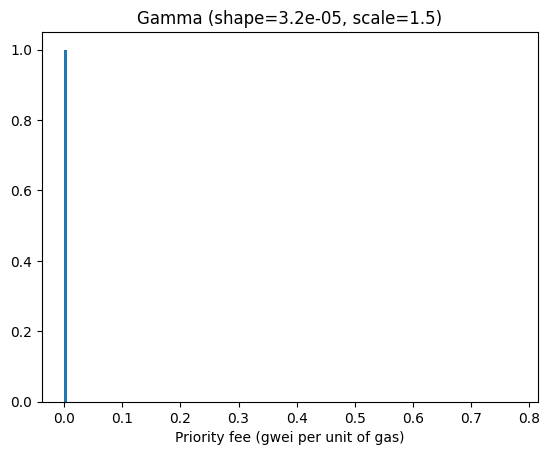

0.0 0.0 157.72


In [13]:
gen = gamma.rvs(a=3.2e-05, scale=1.5, size=100000)

counts, bins = np.histogram(gen, bins=200)
plt.hist(bins[:-1], bins, weights=counts/len(gen))
plt.title("Gamma (shape=3.2e-05, scale=1.5)")
plt.xlabel('Priority fee (gwei per unit of gas)')
plt.show()

print(gen.mean().round(3), gen.std().round(2), np.round(skew(gen), 2))

## Redstone gas usage (testnet)

In [14]:
gas_df = pd.read_csv("../data/redstone-gas-usage-2-weeks.csv")
gas_df["timestamp"] = pd.to_datetime(gas_df['timestamp'])
# Convert rows to 12 second totals
gas_df = (
    gas_df
    .groupby(pd.Grouper(key="timestamp", freq="12S"))
    [["gas_units"]]
    .sum()
    .reset_index()
    .sort_values("timestamp")
)
gas_df = gas_df.iloc[1:-1]
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109770 entries, 1 to 109770
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   timestamp  109770 non-null  datetime64[ns, UTC]
 1   gas_units  109770 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(1)
memory usage: 1.7 MB


In [15]:
print(np.round(sum(gas_df["gas_units"]<350000)/len(gas_df),2), 
      np.round(sum(gas_df["gas_units"]>=350000)/len(gas_df),2))

0.76 0.24


### High value group

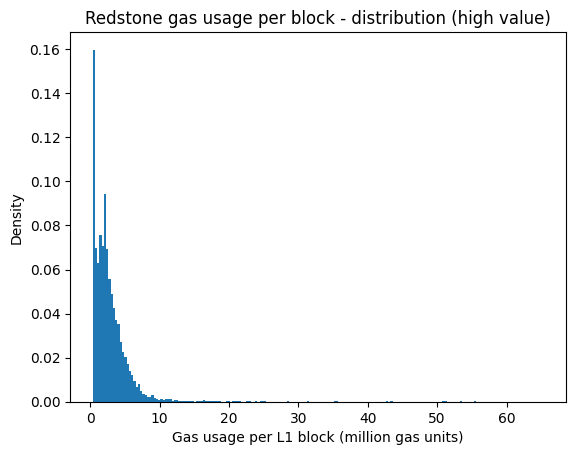

2.861 3.45 7.79


In [16]:
temp = gas_df[gas_df["gas_units"]>=350000]
data = temp["gas_units"].values/1000000

counts, bins = np.histogram(data, bins=200)
plt.hist(bins[:-1], bins, weights=counts/len(data))
plt.title("Redstone gas usage per block - distribution (high value)")
plt.xlabel('Gas usage per L1 block (million gas units)')
plt.ylabel('Density')
plt.show()

print(data.mean().round(3), data.std().round(2), np.round(skew(data), 2))

In [17]:
temp = gas_df[gas_df["gas_units"]>=350000]
data = temp["gas_units"].values/1000000
# a, loc, scale
gamma.fit(data)

(0.06419187749394076, 0.35022899999999996, 7.294144788860272)

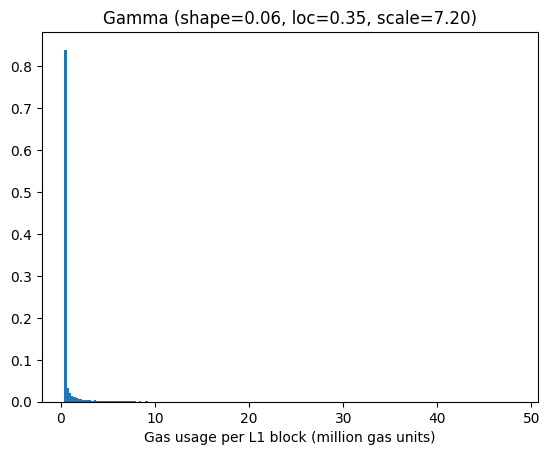

0.778 1.73 7.93


In [18]:
gen = gamma.rvs(a=0.06, loc=0.35, scale=7.2, size=100000)

counts, bins = np.histogram(gen, bins=200)
plt.hist(bins[:-1], bins, weights=counts/len(gen))
plt.title("Gamma (shape=0.06, loc=0.35, scale=7.20)")
plt.xlabel('Gas usage per L1 block (million gas units)')
plt.show()

print(gen.mean().round(3), gen.std().round(2), np.round(skew(gen), 2))

In [19]:
gen = gamma.rvs(a=0.06, loc=0.35, scale=7.2, size=100000) * 1000000
print(gen.mean().round(3), gen.std().round(2), np.round(skew(gen), 2))

gen = gamma.rvs(a=0.06, loc=0.35*1000000, scale=7.2*1000000, size=100000)
print(gen.mean().round(3), gen.std().round(2), np.round(skew(gen), 2))

785365.339 1774293.61 8.46
791315.16 1774024.39 8.09


### Low value group

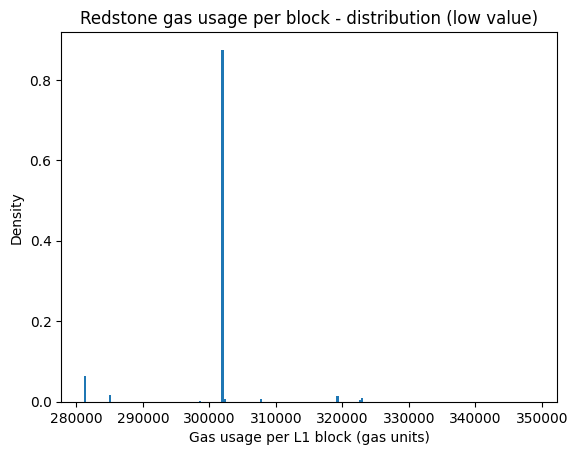

301096.473 6685.87 -0.68


In [20]:
temp = gas_df[gas_df["gas_units"]<350000]
data = temp["gas_units"].values

counts, bins = np.histogram(data, bins=200)
plt.hist(bins[:-1], bins, weights=counts/len(data))
plt.title("Redstone gas usage per block - distribution (low value)")
plt.xlabel('Gas usage per L1 block (gas units)')
plt.ylabel('Density')
plt.show()

print(data.mean().round(3), data.std().round(2), np.round(skew(data), 2))

In [21]:
temp = gas_df[gas_df["gas_units"]<350000]
data = temp["gas_units"].values
# loc, scale
norm.fit(data)

(301096.4729898973, 6685.867984470261)

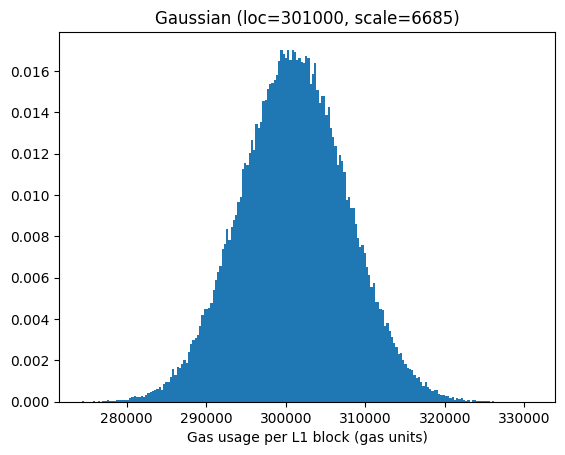

301033.421 6696.98 0.01


In [22]:
gen = norm.rvs(loc=301000, scale=6685, size=100000)

counts, bins = np.histogram(gen, bins=200)
plt.hist(bins[:-1], bins, weights=counts/len(gen))
plt.title("Gaussian (loc=301000, scale=6685)")
plt.xlabel('Gas usage per L1 block (gas units)')
plt.show()

print(gen.mean().round(3), gen.std().round(2), np.round(skew(gen), 2))